**Rate of Change (ROC)**


---


The Rate of Change (ROC) is a technical indicator that measures the percentage change between the most recent price and the price "n" day’s ago. The indicator fluctuates around the zero line.

If the ROC is rising, it gives a bullish signal, while a falling ROC gives a bearish signal. One can compute ROC based on different periods in order to gauge the short-term momentum or long-term momentum.

**Estimation**

**ROC** = [(Close price today - Close price “n” day’s ago) / Close price “n” day’s ago))]

**Python code for computing Rate of Change (ROC)**

Example code: 5-day Rate of Change (ROC) for NIFTY.

In the code below we use the Series, diff, shift, and the join functions to compute the Rate of Change (ROC). The Series function is used to form a series which is a one-dimensional array-like object containing an array of data. The diff function computes the difference in prices between the current day’s price and the price “n” day’s ago. The shift function is used to fetch the previous “n” day’s price. The join function joins a given series with a specified series/dataframe.

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

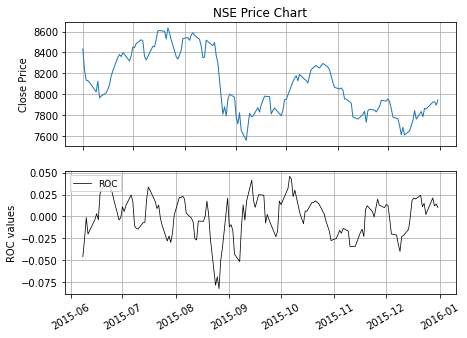

In [2]:
# ROC indicator

# Rate of Change code

# Load the necessary packages and modules
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance
import pandas as pd

# Rate of Change (ROC)
def ROC(data,n):
 N = data['Close'].diff(n)
 D = data['Close'].shift(n)
 ROC = pd.Series(N/D,name='Rate of Change')
 data = data.join(ROC)
 return data 
 
# Retrieve the NIFTY data from Yahoo finance:
data = pdr.get_data_yahoo("^NSEI", start="2015-06-01", end="2016-01-01") 
data = pd.DataFrame(data)

# Compute the 5-period Rate of Change for NIFTY
n = 5
NIFTY_ROC = ROC(data,n)
ROC = NIFTY_ROC['Rate of Change']

# Plotting the Price Series chart and the Ease Of Movement below
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])
plt.plot(data['Close'],lw=1)
plt.title('NSE Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx = fig.add_subplot(2, 1, 2)
plt.plot(ROC,'k',lw=0.75,linestyle='-',label='ROC')
plt.legend(loc=2,prop={'size':9})
plt.ylabel('ROC values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)